In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from Gradient_based_methods import *
from Heuristic_methods import *

In [2]:
def sphere(x, y):
    return x**2 + y**2

def saddle_test(x, y):
    return  x**2 - y**2

def rastrigin(x, y):
    return 20 + x**2 + y**2 - 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def ackley(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
           np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

def eggholder(x, y):
    return -(y + 47) * np.sin(np.sqrt(np.abs(x/2 + y + 47))) - \
           x * np.sin(np.sqrt(np.abs(x - (y + 47))))

Gradients and vectors

In [3]:
# --- SPHERE ---
def sphere_vec(x):
    return x[0]**2 + x[1]**2

def grad_sphere(x):
    return 2 * x

def hess_sphere(x):
    return np.array([[2, 0], [0, 2]])


# --- SADDLE ---
def saddle_vec(x):
    return x[0]**2 - x[1]**2

def grad_saddle(x):
    return np.array([2 * x[0], -2 * x[1]])

def hess_saddle(x):
    return np.array([[2, 0], [0, -2]])


# --- RASTRIGIN ---
def rastrigin_vec(x):
    return 20 + x[0]**2 + x[1]**2 - 10 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))

def grad_rastrigin(x):
    dx = 2 * x[0] + 20 * np.pi * np.sin(2 * np.pi * x[0])
    dy = 2 * x[1] + 20 * np.pi * np.sin(2 * np.pi * x[1])
    return np.array([dx, dy])


# --- HIMMELBLAU ---
def himmelblau_vec(x):
    x1, x2 = x[0], x[1]
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

def grad_himmelblau(x):
    x1, x2 = x[0], x[1]
    dx = 4 * x1 * (x1**2 + x2 - 11) + 2 * (x1 + x2**2 - 7)
    dy = 2 * (x1**2 + x2 - 11) + 4 * x2 * (x1 + x2**2 - 7)
    return np.array([dx, dy])


# --- ACKLEY ---
def ackley_vec(x):
    x1, x2 = x[0], x[1]
    sum_sq = 0.5 * (x1**2 + x2**2)
    cos_sum = 0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))
    return -20 * np.exp(-0.2 * np.sqrt(sum_sq)) - np.exp(cos_sum) + 20 + np.e

def grad_ackley(x):
    x1, x2 = x[0], x[1]
    sq = 0.5 * (x1**2 + x2**2)
    sqrt_sq = np.sqrt(sq)
    exp1 = np.exp(-0.2 * sqrt_sq)
    exp2 = np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)))

    dfdx = (4 * x1 * exp1 / (10 * sqrt_sq)) + (2 * np.pi * np.sin(2 * np.pi * x1) * exp2)
    dfdy = (4 * x2 * exp1 / (10 * sqrt_sq)) + (2 * np.pi * np.sin(2 * np.pi * x2) * exp2)
    return np.array([dfdx, dfdy])


# --- EGGHOLDER ---
def eggholder_vec(x):
    x1, x2 = x[0], x[1]
    return -(x2 + 47) * np.sin(np.sqrt(abs(x1 / 2 + x2 + 47))) - x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))

# : < 

In [4]:
def plot_3d_function(func, xlim, ylim, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    X = np.linspace(*xlim, 200)
    Y = np.linspace(*ylim, 200)
    X, Y = np.meshgrid(X, Y)
    Z = func(X, Y)
    
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.tight_layout()
    plt.show()

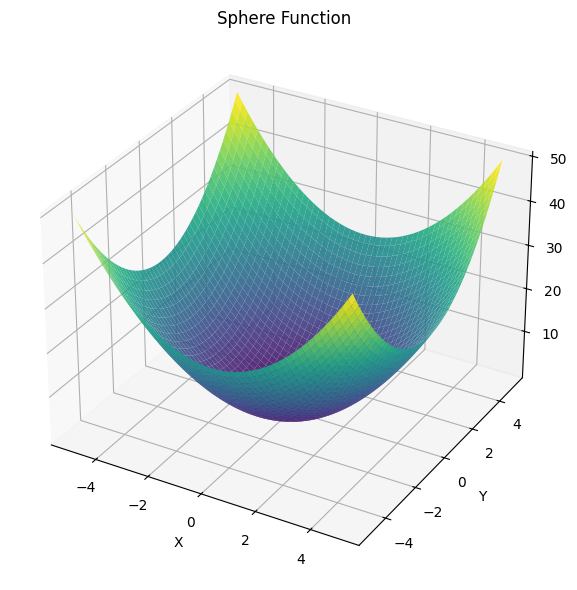

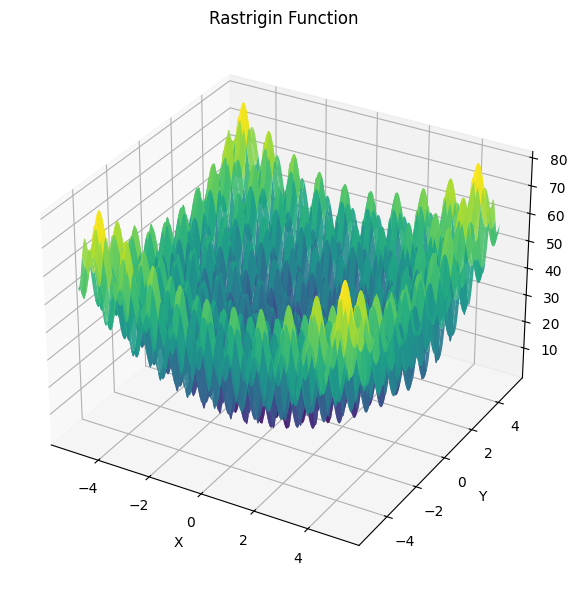

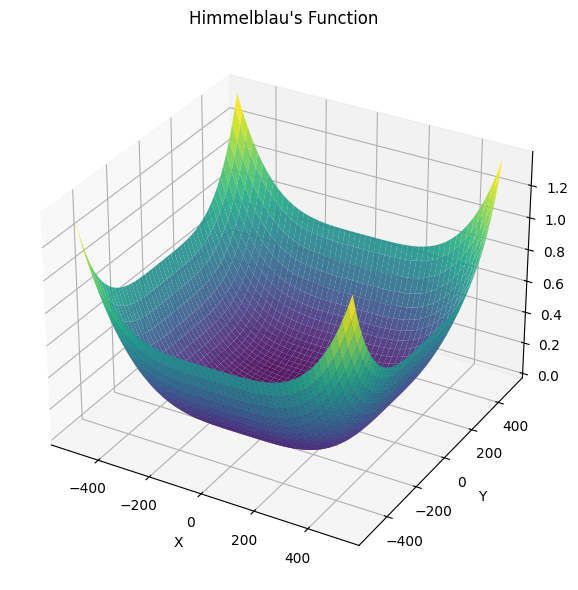

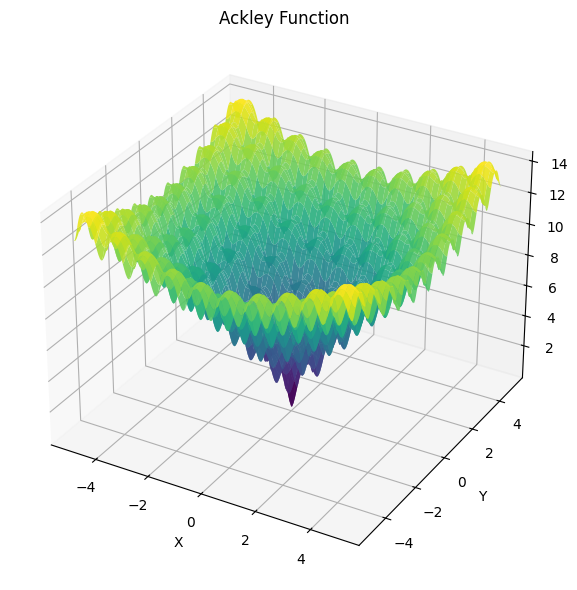

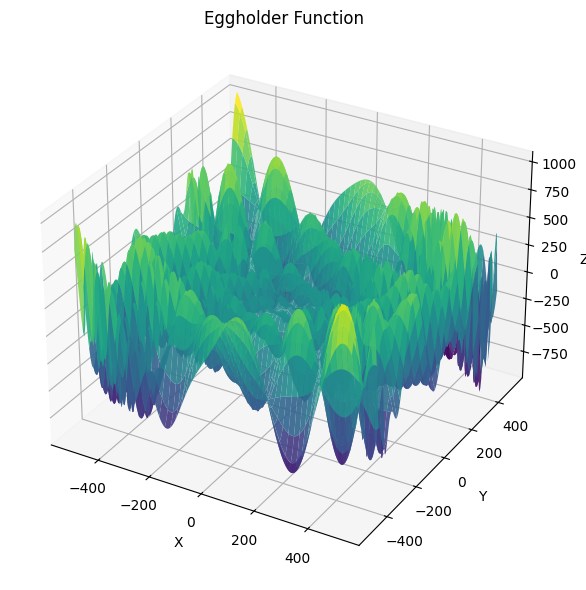

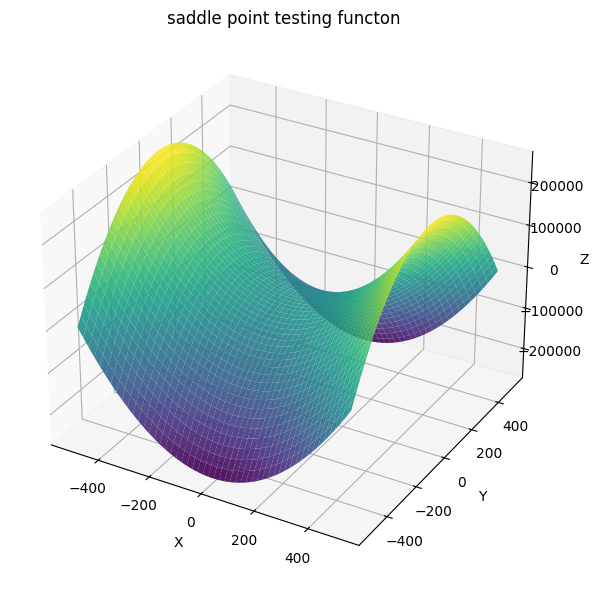

In [5]:
plot_3d_function(sphere, (-5, 5), (-5, 5), "Sphere Function")
plot_3d_function(rastrigin, (-5.12, 5.12), (-5.12, 5.12), "Rastrigin Function")
plot_3d_function(himmelblau, (-512, 512), (-512, 512), "Himmelblau's Function")
plot_3d_function(ackley, (-5, 5), (-5, 5), "Ackley Function")
plot_3d_function(eggholder, (-512, 512), (-512, 512), "Eggholder Function")
plot_3d_function(saddle_test, (-512, 512), (-512, 512), "saddle point testing functon" )

Example Usage 

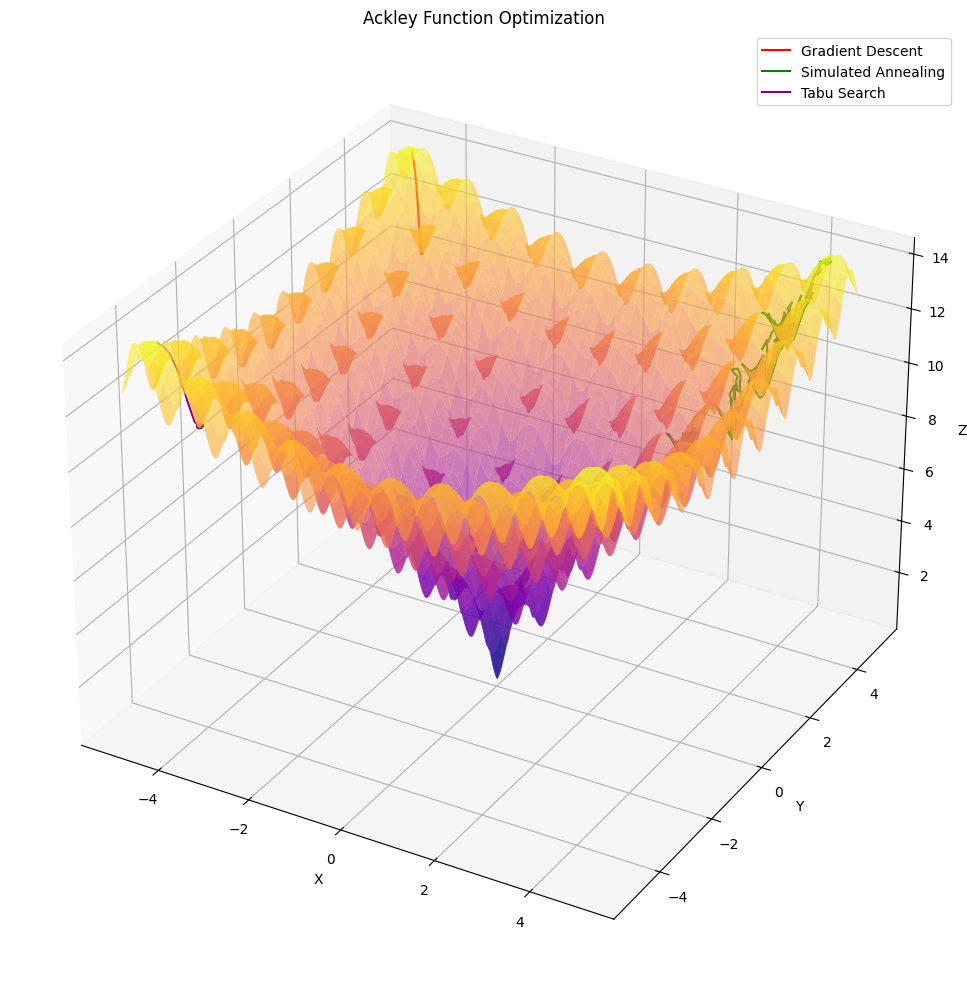

Ackley Optimization Results:
  Gradient Descent: 11.010559
  Simulated Annealing: 7.961792
  Tabu Search: 10.998287



In [24]:
# --- Setup for Ackley ---
x0_ackley_gd = np.array([-4.5, 4.5])
x0_ackley_sim_ann = np.array([4.5, 4.5])
x0_ackley_tabu_search = np.array([-4.5, -4.5])

bounds_ackley = np.array([[-5, 5], [-5, 5]])

opt_gd_a, path_gd_a = gradient_descent(grad_ackley, x0_ackley_gd, lr=0.01, max_iters=1000)
opt_sa_a, path_sa_a = simulated_annealing(ackley_vec, x0_ackley_sim_ann, bounds_ackley, max_iters=1000, temp = 30, cooling = 0.99)
opt_tabu_a, path_tabu_a = tabu_search(ackley_vec, x0_ackley_tabu_search, bounds_ackley, max_iters= 1000, tabu_size= 30, step = 0.1)

path_gd_a = np.array(path_gd_a)
path_sa_a = np.array(path_sa_a)
path_tabu_a = np.array(path_tabu_a)

Z_gd_a = [ackley(x[0], x[1]) for x in path_gd_a]
Z_sa_a = [ackley(x[0], x[1]) for x in path_sa_a]
Z_tabu_a = [ackley(x[0], x[1]) for x in path_tabu_a]

x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.6, edgecolor='none')

ax.plot(path_gd_a[:, 0], path_gd_a[:, 1], Z_gd_a, 'r-', label='Gradient Descent')
ax.plot(path_sa_a[:, 0], path_sa_a[:, 1], Z_sa_a, 'g-', label='Simulated Annealing')
ax.plot(path_tabu_a[:, 0], path_tabu_a[:, 1], Z_tabu_a, 'purple', label='Tabu Search')

ax.set_title("Ackley Function Optimization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.tight_layout()
plt.show()

print("Ackley Optimization Results:")
print(f"  Gradient Descent: {ackley_vec(opt_gd_a):.6f}")
print(f"  Simulated Annealing: {ackley_vec(opt_sa_a):.6f}")
print(f"  Tabu Search: {ackley_vec(opt_tabu_a):.6f}")
print()

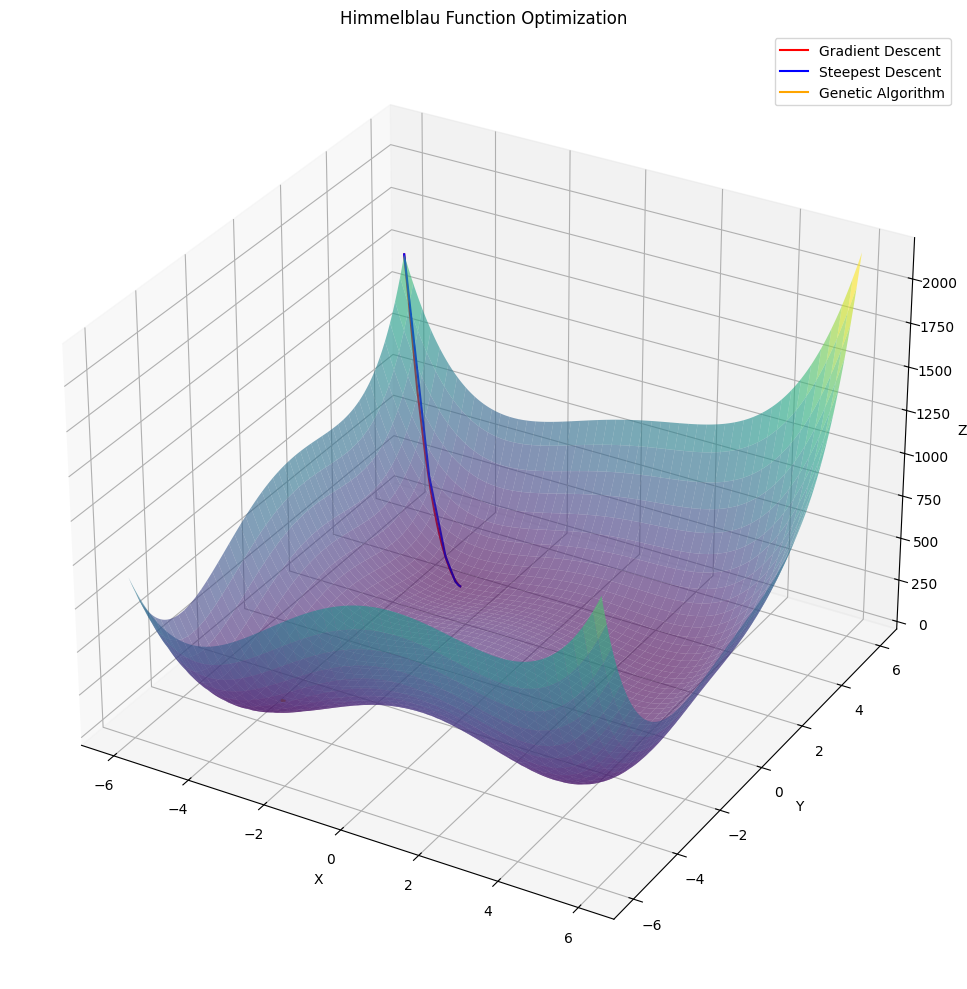

Himmelblau Optimization Results:
  Gradient Descent: 0.000000
  Steepest Descent: 0.000000
  Genetic Algorithm: 0.000080


In [25]:
# --- Setup for Himmelblau ---
x0_himmel = np.array([-6.0, 6.0])
bounds_himmel = np.array([[-6, 6], [-6, 6]])

opt_gd_h, path_gd_h = gradient_descent(grad_himmelblau, x0_himmel, lr=0.001, max_iters=10000)
opt_sd_h, path_sd_h = steepest_descent(himmelblau_vec, grad_himmelblau, x0_himmel, max_iters=1000)
opt_ga_h, path_ga_h = genetic_algorithm(himmelblau_vec, bounds_himmel, generations=200)

path_gd_h = np.array(path_gd_h)
path_sd_h = np.array(path_sd_h)
path_ga_h = np.array(path_ga_h)

Z_gd_h = [himmelblau(x[0], x[1]) for x in path_gd_h]
Z_sd_h = [himmelblau(x[0], x[1]) for x in path_sd_h]
Z_ga_h = [himmelblau(x[0], x[1]) for x in path_ga_h]

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

ax.plot(path_gd_h[:, 0], path_gd_h[:, 1], Z_gd_h, 'r-', label='Gradient Descent')
ax.plot(path_sd_h[:, 0], path_sd_h[:, 1], Z_sd_h, 'b-', label='Steepest Descent')
ax.plot(path_ga_h[:, 0], path_ga_h[:, 1], Z_ga_h, 'orange', label='Genetic Algorithm')

ax.set_title("Himmelblau Function Optimization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.tight_layout()
plt.show()

print("Himmelblau Optimization Results:")
print(f"  Gradient Descent: {himmelblau_vec(opt_gd_h):.6f}")
print(f"  Steepest Descent: {himmelblau_vec(opt_sd_h):.6f}")
print(f"  Genetic Algorithm: {himmelblau_vec(opt_ga_h):.6f}")

